# <center><font color=darkred>Assignment 3 </font>

# <center><font color=darkred> Morphological operation </font>

# <font color=darkred size=4>1-Needed Packages

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import img_as_ubyte,img_as_float
from skimage import data, io, filters
from matplotlib.pyplot import imshow, show
from skimage.exposure import rescale_intensity
from skimage.transform import rescale, resize
from skimage.morphology import erosion, dilation, opening, closing
from skimage.morphology import disk

## Image Rendering:

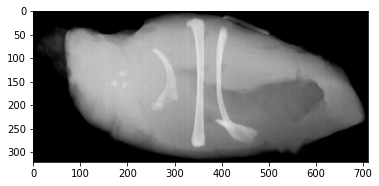

In [ ]:
img = io.imread('Chickenfilet with bones.tif')
plt.imshow(img,'gray',vmin=0, vmax=255 )
plt.show()

# Task 1:
     Implement your function to extract the connected components from above image using Morphological operation ?

# <font color=darkred size=4>1-Solution 

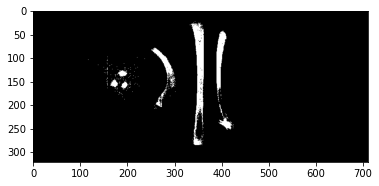

In [ ]:
img[img>=200] = 255
img[img<200] = 0
plt.imshow(img ,'gray',vmin=0, vmax=255 )

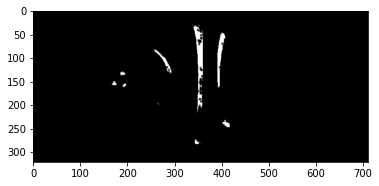

In [ ]:
def Erosion(img):
  img1 = np.copy(img)
  for i in range(20,img1.shape[0]-20):
    for j in range(20,img1.shape[1]-20):
      l1 = []
      l1.append(img[i][j])
      for k in range (1,3):
        l1.append(img[i+k][j])
        l1.append(img[i][j+k])
        l1.append(img[i-k][j])
        l1.append(img[i-k][j-k])
        l1.append(img[i+k][j-k])
        l1.append(img[i+k][j+k])
        l1.append(img[i-k][j+k])
      
      img1[i][j] = min(l1)
      output = img1
  return output
plt.imshow(Erosion(img) ,'gray',vmin=0, vmax=255 )

# Task 2:
     Given a point inside the whole white circle, Implement your function to fill these black circle ?

## Image Rendering:

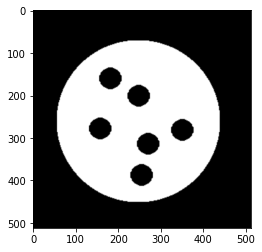

In [ ]:
img = io.imread('filling.gif')
image = resize(img, (512, 512))
plt.imshow(image, cmap=plt.cm.gray)

# <font color=darkred size=4>2-Solution 

#Using Closing

In [ ]:
def Erosion(img):
  img1 = np.copy(img)
  for i in range(20,img1.shape[0]-20):
    for j in range(20,img1.shape[1]-20):
      l1 = []
      l1.append(img[i][j])
      for k in range (20):
        l1.append(img[i+k][j])
        l1.append(img[i][j+k])
        l1.append(img[i-k][j])
        l1.append(img[i-k][j-k])
        l1.append(img[i+k][j-k])
        l1.append(img[i+k][j+k])
        l1.append(img[i-k][j+k])
      
      img1[i][j] = min(l1)
      output = img1
  return output
def Dilation(img):
  img1 = np.copy(img)
  for i in range(20,img1.shape[0]-20):
    for j in range(20,img1.shape[1]-20):
      l1 = []
      l1.append(img[i][j])
      for k in range (20):
        l1.append(img[i+k][j])
        l1.append(img[i][j+k])
        l1.append(img[i-k][j])
        l1.append(img[i-k][j-k])
        l1.append(img[i+k][j-k])
        l1.append(img[i+k][j+k])
        l1.append(img[i-k][j+k])
      
      img1[i][j] = max(l1)
      output = img1
  return output
def Closing(img):
  return Erosion(Dilation(img))

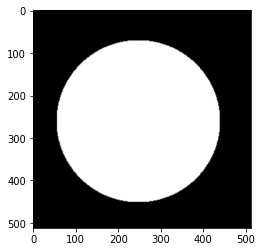

In [ ]:
plt.imshow(Closing(image), cmap=plt.cm.gray)

#Flood Fill Method

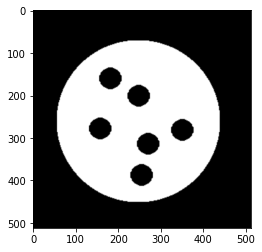

In [ ]:
plt.imshow(image, cmap=plt.cm.gray)

In [ ]:
image.max()

1.0

In [ ]:
from skimage.segmentation import flood, flood_fill
filled = flood_fill(image, (0,0), 1)

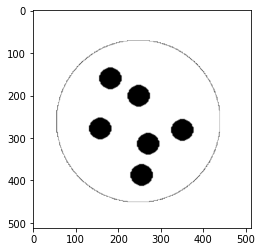

In [ ]:
plt.imshow(filled, cmap=plt.cm.gray)

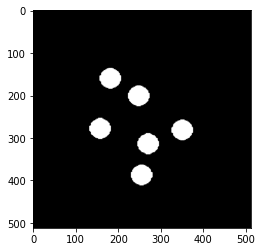

In [ ]:
filled = np.logical_not(filled)
plt.imshow(filled, cmap=plt.cm.gray)

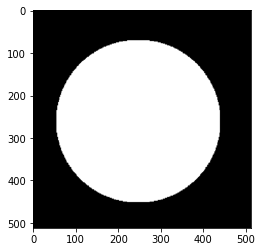

In [ ]:
final = np.logical_or(image,filled)
plt.imshow(final, cmap=plt.cm.gray)